### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Another awful experience b...
1,"✅ Trip Verified | The service was rude, full..."
2,✅ Trip Verified | This flight was a joke. Th...
3,✅ Trip Verified | This time British Airways ...
4,"✅ Trip Verified | The seats were excellent, ..."


 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [7]:
df

,reviews
0,✅ Trip Verified | Another awful experience b...
1,"✅ Trip Verified | The service was rude, full..."
2,✅ Trip Verified | This flight was a joke. Th...
3,✅ Trip Verified | This time British Airways ...
4,"✅ Trip Verified | The seats were excellent, ..."
...,...
995,✅ Trip Verified | Glasgow to Tampa via Gatwic...
996,Not Verified | Orlando to Gatwick. Travelling...
997,✅ Trip Verified | London to Abu Dhabi. This i...
998,✅ Trip Verified | London to St Petersburgh. H...


Removing the parts before | in the reviews column

In [8]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [9]:
df

,reviews
0,Another awful experience by British Airways...
1,"The service was rude, full of attitude to m..."
2,This flight was a joke. There was four peop...
3,This time British Airways managed to get ev...
4,"The seats were excellent, with a feel of mu..."
...,...
995,Glasgow to Tampa via Gatwick. Early morning ...
996,Orlando to Gatwick. Travelling home was extr...
997,London to Abu Dhabi. This is the daytime fli...
998,London to St Petersburgh. Huge disappointmen...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Step 1: Cleaning the text

In [10]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Another awful experience by British Airways...,Another awful experience by British Airways T...
1,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...
2,This flight was a joke. There was four peop...,This flight was a joke There was four people ...
3,This time British Airways managed to get ev...,This time British Airways managed to get ever...
4,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...


In [11]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet



In [12]:
def token_stop_pos(text):
    from nltk.tokenize import word_tokenize
    from nltk import pos_tag
    tokens = word_tokenize(text)
    return pos_tag(tokens)

print(token_stop_pos("This is a test sentence."))

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('test', 'NN'), ('sentence', 'NN'), ('.', '.')]


In [13]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.
# POS tagger dictionary
import nltk
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,Another awful experience by British Airways...,Another awful experience by British Airways T...,"[(Another, None), (awful, a), (experience, n),..."
1,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...,"[(service, n), (rude, a), (full, a), (attitude..."
2,This flight was a joke. There was four peop...,This flight was a joke There was four people ...,"[(flight, n), (joke, n), (four, None), (people..."
3,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag..."
4,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,..."


In [14]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Another awful experience by British Airways...,Another awful experience by British Airways T...,"[(Another, None), (awful, a), (experience, n),...",Another awful experience British Airways fli...
1,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...,"[(service, n), (rude, a), (full, a), (attitude...",service rude full attitude food poorly servi...
2,This flight was a joke. There was four peop...,This flight was a joke There was four people ...,"[(flight, n), (joke, n), (four, None), (people...",flight joke four people business class inclu...
3,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...
4,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...


In [15]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Another awful experience by British Airways...,Another awful experience British Airways fli...
1,"The service was rude, full of attitude to m...",service rude full attitude food poorly servi...
2,This flight was a joke. There was four peop...,flight joke four people business class inclu...
3,This time British Airways managed to get ev...,time British Airways manage get everything r...
4,"The seats were excellent, with a feel of mu...",seat excellent feel much room official seat ...
...,...,...
995,Glasgow to Tampa via Gatwick. Early morning ...,Glasgow Tampa via Gatwick Early morning flig...
996,Orlando to Gatwick. Travelling home was extr...,Orlando Gatwick Travelling home extremely di...
997,London to Abu Dhabi. This is the daytime fli...,London Abu Dhabi daytime flight London good ...
998,London to St Petersburgh. Huge disappointmen...,London St Petersburgh Huge disappointment BA...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.



In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Another awful experience by British Airways...,Another awful experience by British Airways T...,"[(Another, None), (awful, a), (experience, n),...",Another awful experience British Airways fli...,-0.8316,Negative
1,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...,"[(service, n), (rude, a), (full, a), (attitude...",service rude full attitude food poorly servi...,-0.6437,Negative
2,This flight was a joke. There was four peop...,This flight was a joke There was four people ...,"[(flight, n), (joke, n), (four, None), (people...",flight joke four people business class inclu...,-0.2960,Negative
3,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...,0.9831,Positive
4,"The seats were excellent, with a feel of mu...",The seats were excellent with a feel of much ...,"[(seats, n), (excellent, a), (feel, n), (much,...",seat excellent feel much room official seat ...,0.5719,Positive


In [17]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    458
Negative    428
Neutral     114
Name: count, dtype: int64

# Visual Representation

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x2520220c800>,
 [Text(0.1447207802999444, 1.0904383961276196, 'Positive'),
  Text(-0.5177742897621296, -0.9705203680816402, 'Negative'),
  Text(1.2643423691745355, -0.47322127330681485, 'Neutral')],
 [Text(0.0789386074363333, 0.5947845797059743, '45.8%'),
  Text(-0.28242233987025245, -0.5293747462263492, '42.8%'),
  Text(0.7960674176284112, -0.29795413504503154, '11.4%')])

In [19]:
df.to_csv("BA_reviews.csv")

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

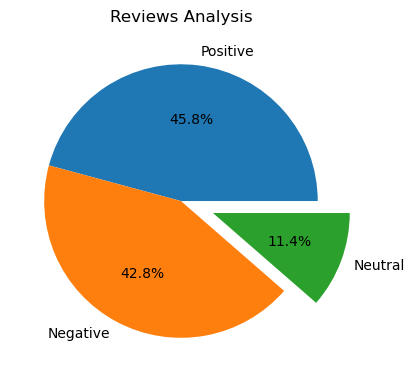

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

# Task 2 - Predict customer buying behaviour

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [22]:
%cd "C:\Users\1234s\Desktop\Internships\British airways"

C:\Users\1234s\Desktop\Internships\British airways


In [23]:
df= pd.read_csv("customer_booking.csv", encoding='ISO-8859-1')

In [24]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Exploratory Data Analysis

In [25]:
#checking for datatypes

df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [26]:
df.shape

(50000, 14)

In [27]:
#null values

df.isnull().sum()

#there is no null values

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [28]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

# Mutual Information

In [29]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete         

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [30]:
X.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [31]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

route                    0.052062
booking_origin           0.049028
flight_duration          0.017009
length_of_stay           0.008739
wants_extra_baggage      0.008209
wants_in_flight_meals    0.005726
num_passengers           0.004578
purchase_lead            0.003498
wants_preferred_seat     0.001749
flight_hour              0.001661
flight_day               0.000290
sales_channel            0.000000
trip_type                0.000000
Name: MI Scores, dtype: float64

In [42]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

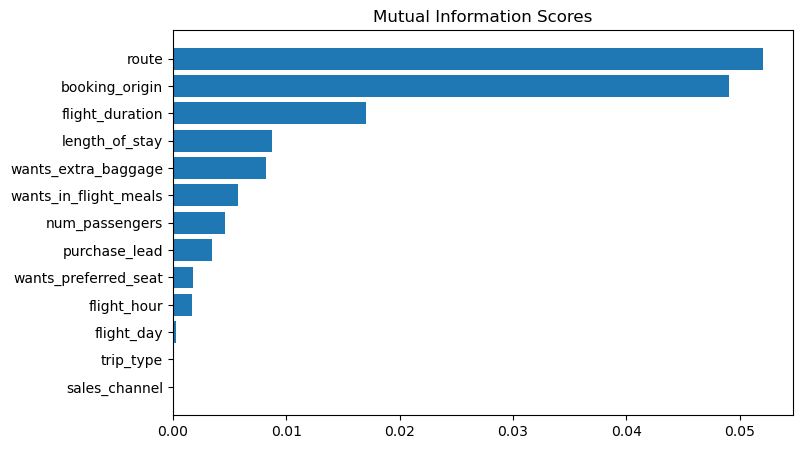

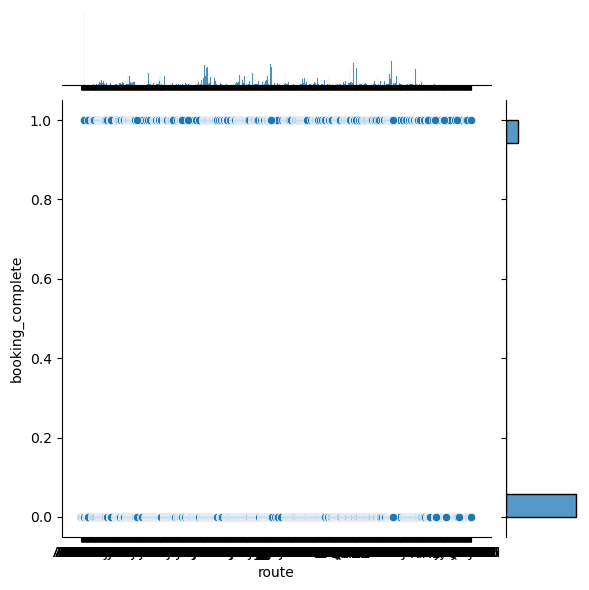

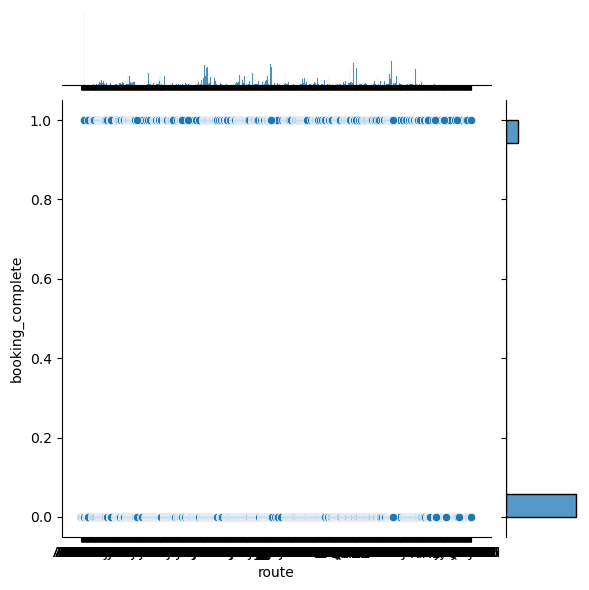

In [41]:
sns.jointplot(data=df,x='route',y='booking_complete')
plt.show()

We can see

1.   route 
2.   booking_origin
3.   flight_duration          
4.   wants_extra_baggage      
5.   length_of_stay          

 are the top 5 features which are dependant with booking_complete feature

In [34]:
#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [35]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

# Model 1 : Random forest classifier with top 6 features

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.36
AUC score:  0.5657818407546988


# Model 2 : Random forest classifier with all features

In [37]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


# Model 3 : XGB classifier with top 6 features

In [38]:
from xgboost import XGBClassifier

X= df[features]

#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)

y= df.booking_complete    

X_train,X_val,y_train,y_val= dataset(X,y)
xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score:', roc_auc_score(y_val, prediction_xgb))

ACCURACY:  84.69
AUC score: 0.519034671509967


# Model 4 : XGB classifier with all features

In [39]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete 

X_train,X_val,y_train,y_val= dataset(X,y)


xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)
print('AUC score: ',roc_auc_score(y_val,prediction_xgb))

ACCURACY:  84.82
AUC score:  0.5396241099972424


Finalizing random forest model with all features as final model, as it has goos accuracy and higher auc score compared to other models

Validating with test data set

In [40]:
X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete       

train_full_X,test_X, train_full_y, test_y = train_test_split(X, y,test_size=0.2,random_state = 0)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(train_full_X, train_full_y)
preds= forest_model.predict(test_X)

print('ACCURACY: ',accuracy_score(test_y,preds)*100)
print('AUC score: ',roc_auc_score(test_y,preds))

ACCURACY:  85.09
AUC score:  0.5577796717361984
